In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#importing the necessary libraries...

In [2]:
df=pd.read_csv(r"D:\databaseR\Flight.csv")   #reading the file...

In [3]:
df.head()    

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay
0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,1451.0,91.0,79.0,23.0,447.0,11.0
1,10.0,15.0,4.0,729.0,730.0,903.0,849.0,1451.0,94.0,79.0,14.0,447.0,-1.0
2,10.0,17.0,6.0,741.0,730.0,918.0,849.0,1451.0,97.0,79.0,29.0,447.0,11.0
3,10.0,18.0,7.0,729.0,730.0,847.0,849.0,1451.0,78.0,79.0,-2.0,447.0,-1.0
4,10.0,19.0,1.0,749.0,730.0,922.0,849.0,1451.0,93.0,79.0,33.0,447.0,19.0


In [4]:
df.shape   #checking the structure of data...

(1048575, 13)

# Data Cleaning

In [5]:
df.isnull().sum()   #checking for nulls in data

w                      674
DayofMonth             674
DayOfWeek              674
DepTime              15179
CRSDepTime             674
ArrTime              17959
CRSArrTime             674
FlightNum              674
ActualElapsedTime    17959
CRSElapsedTime         674
ArrDelay             17959
Distance               674
DepDelay             15179
dtype: int64

# Checking for total nulls

In [6]:
Null_values_percentage=(df.isnull().sum().sum()/len(df))*100
Null_values_percentage

8.547504947190236

In [7]:
# As there are only 8% nulls we drop the null values...
df=df.dropna()
df.shape

(1030616, 13)

In [8]:
df.isna().sum()   #No nulls present now...

w                    0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
Distance             0
DepDelay             0
dtype: int64

In [9]:
df["Delayed"]=df.DepDelay>=15

In [10]:
df["Delayed"]= df.Delayed.replace({False:0,True:1})     #if delayed time is greater than 15 then only we will consider flight as delayed...

In [11]:
df.head()

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay,Delayed
0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,1451.0,91.0,79.0,23.0,447.0,11.0,0
1,10.0,15.0,4.0,729.0,730.0,903.0,849.0,1451.0,94.0,79.0,14.0,447.0,-1.0,0
2,10.0,17.0,6.0,741.0,730.0,918.0,849.0,1451.0,97.0,79.0,29.0,447.0,11.0,0
3,10.0,18.0,7.0,729.0,730.0,847.0,849.0,1451.0,78.0,79.0,-2.0,447.0,-1.0,0
4,10.0,19.0,1.0,749.0,730.0,922.0,849.0,1451.0,93.0,79.0,33.0,447.0,19.0,1


# Analysis of Data

# Delayed:- Target Variable

In [12]:
df['Delayed'].value_counts()

0    882027
1    148589
Name: Delayed, dtype: int64

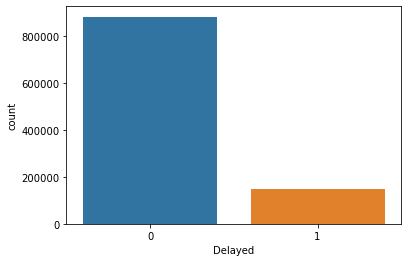

In [13]:
sns.countplot(df['Delayed'])

In [14]:
# From above plot we can say that 85% of time flight is not delayed...

# Day Of Week:-variable

In [15]:
df['DayOfWeek'].value_counts()

4.0    156057
1.0    151997
5.0    149423
7.0    145235
3.0    144489
2.0    143820
6.0    139595
Name: DayOfWeek, dtype: int64

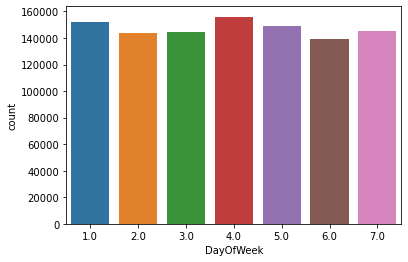

In [16]:
sns.countplot(df['DayOfWeek'])

In [17]:
#From above plot we can say that on 4th day of week flights running are highest in number...ArrDelay

# Distance:Variable

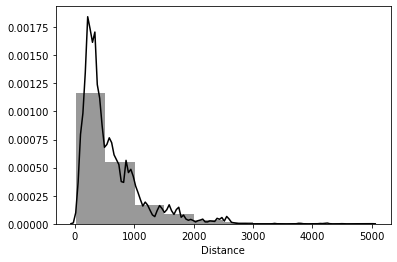

In [18]:
sns.distplot(df['Distance'],bins=10,color='k')

In [19]:
#Average distnace travelled is around 500 km...DepDelay

# DepDelay:Variable

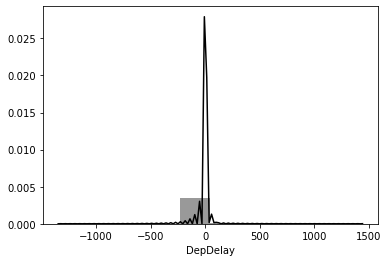

In [20]:
sns.distplot(df['DepDelay'],bins=10,color='k')

In [21]:
# Average departure delay is almost negligible... 

# ArrDelay:Variable

In [22]:
df['ArrDelay'].value_counts()

 0.0      50585
 2.0      37842
 3.0      37491
-2.0      37271
 5.0      36021
          ...  
 940.0        1
 769.0        1
 355.0        1
 357.0        1
 509.0        1
Name: ArrDelay, Length: 595, dtype: int64

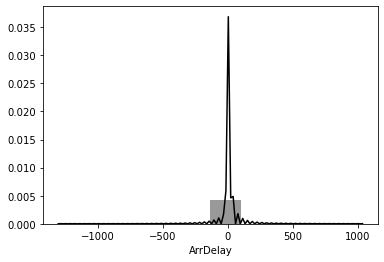

In [23]:
sns.distplot(df['ArrDelay'],bins=10,color='k')

In [24]:
# Average arrival delay is almost negligible... 

# CRSElapsedTime:Variable

In [25]:
df['CRSElapsedTime'].value_counts()

 60.0     36080
 50.0     28225
 70.0     28062
 65.0     25168
 55.0     24310
          ...  
 10.0         1
 15.0         1
-10.0         1
 371.0        1
 1.0          1
Name: CRSElapsedTime, Length: 406, dtype: int64

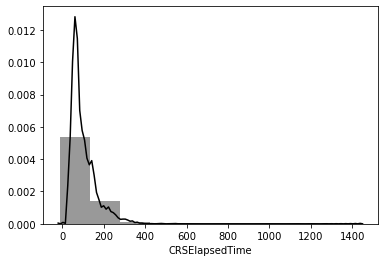

In [26]:
sns.distplot(df['CRSElapsedTime'],bins=10,color='k')  

In [27]:
#Average CRSE lapsed Time is around 100...

# ActualElapsedTime:-Variable

In [28]:
df['ActualElapsedTime'].value_counts()

60.0     14661
65.0     13942
55.0     13661
70.0     13240
50.0     12479
         ...  
572.0        1
671.0        1
545.0        1
678.0        1
620.0        1
Name: ActualElapsedTime, Length: 632, dtype: int64

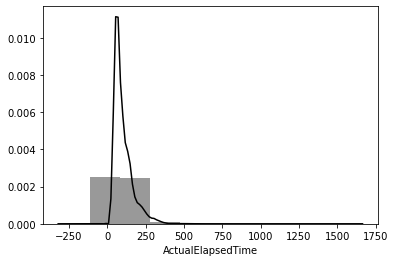

In [29]:
sns.distplot(df['ActualElapsedTime'],bins=10,color='k')

In [30]:
#Average of actual elapsed time is around 100...

# FlightNum

In [31]:
df['FlightNum'].value_counts()

416.0     1537
430.0     1472
91.0      1458
85.0      1444
202.0     1443
          ... 
2748.0       1
1979.0       1
1533.0       1
1962.0       1
4649.0       1
Name: FlightNum, Length: 2141, dtype: int64

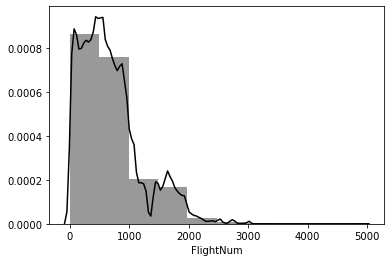

In [32]:
sns.distplot(df['FlightNum'],bins=10,color='k') 

# CRSArrTime

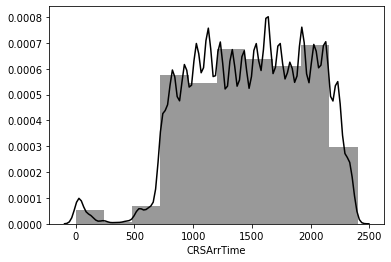

In [33]:
sns.distplot(df['CRSArrTime'],bins=10,color='k')

In [34]:
#Average of CRSArrTime is around 1500...

# ArrTime:-Variable

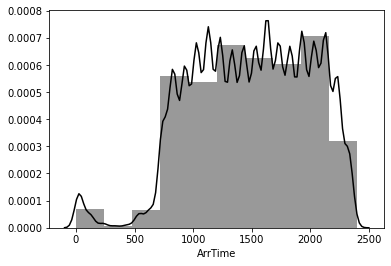

In [35]:
sns.distplot(df['ArrTime'],bins=10,color='k')

In [36]:
#Average of ArrTime is around 1500...

# CRSDepTime:-Variable

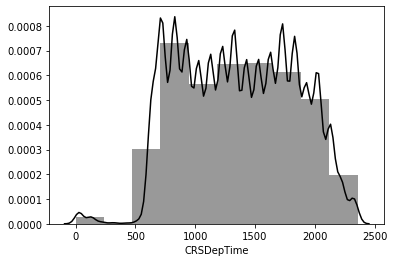

In [37]:
sns.distplot(df['CRSDepTime'],bins=10,color='k')

In [38]:
#Average of CRSDepTime is around 1350...

# Dep Time:- Variable

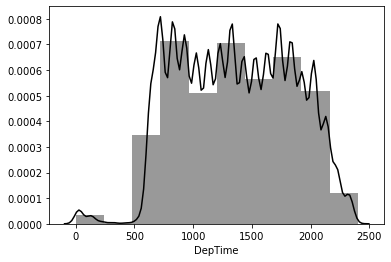

In [39]:
sns.distplot(df['DepTime'],bins=10,color='k')

In [40]:
#Average of DepTime is around 1350...

# Day of Month Variable

In [41]:
df['DayofMonth'].value_counts()

9.0     35090
2.0     35075
23.0    34833
6.0     34822
13.0    34713
30.0    34610
20.0    34593
5.0     34430
4.0     34351
19.0    34288
16.0    34283
8.0     34269
22.0    34248
29.0    34143
18.0    34077
1.0     33950
3.0     33935
12.0    33907
7.0     33880
21.0    33715
10.0    33604
11.0    33475
17.0    33347
25.0    33156
24.0    33128
14.0    32792
15.0    32248
28.0    31919
26.0    31124
27.0    30138
31.0    18473
Name: DayofMonth, dtype: int64

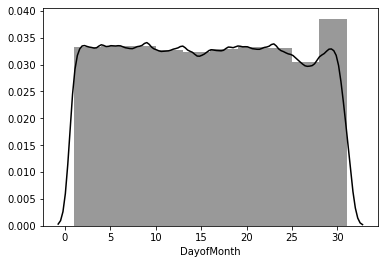

In [42]:
sns.distplot(df['DayofMonth'],hist=True,kde=True,color='k',bins=10)

# Co-relation of variables in dataset

In [43]:
df.corr()

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay,Delayed
w,1.000000,-0.018900,-0.032610,0.004490,0.000745,-0.003260,-0.002086,0.019305,0.017530,0.012551,0.115287,0.006635,0.109071,0.121573
DayofMonth,-0.018900,1.000000,0.004463,-0.001307,-0.003622,-0.002592,-0.003033,-0.000430,0.005469,0.004397,0.046267,0.003319,0.048393,0.057390
DayOfWeek,-0.032610,0.004463,1.000000,0.005696,0.006364,0.005386,0.008164,-0.001296,0.000807,0.009619,-0.032619,0.009900,-0.009190,-0.014166
DepTime,0.004490,-0.001307,0.005696,1.000000,0.981500,0.781862,0.819725,0.020573,-0.045488,-0.044698,0.114994,-0.051242,0.131750,0.159729
CRSDepTime,0.000745,-0.003622,0.006364,0.981500,1.000000,0.768944,0.815126,0.018367,-0.047189,-0.045753,0.089722,-0.051053,0.102331,0.128992
ArrTime,-0.003260,-0.002592,0.005386,0.781862,0.768944,1.000000,0.935394,0.005239,0.049833,0.048460,0.070579,0.039033,0.074247,0.122665
CRSArrTime,-0.002086,-0.003033,0.008164,0.819725,0.815126,0.935394,1.000000,0.002714,0.051900,0.054203,0.087552,0.045649,0.101286,0.125291
FlightNum,0.019305,-0.000430,-0.001296,0.020573,0.018367,0.005239,0.002714,1.000000,-0.161549,-0.169574,0.044727,-0.168914,0.032287,0.034996
ActualElapsedTime,0.017530,0.005469,0.000807,-0.045488,-0.047189,0.049833,0.051900,-0.161549,1.000000,0.984082,0.106509,0.973683,0.052865,0.049785
CRSElapsedTime,0.012551,0.004397,0.009619,-0.044698,-0.045753,0.048460,0.054203,-0.169574,0.984082,1.000000,0.020196,0.985225,0.048660,0.043867


In [44]:
#dropping columns which are not important      CRSDepTime and DepTime (0), CRSArrTime and DepTime (0), CRSArrTime and ArrTime(1), 
                                               #CRSElapsedTime and ActualElapsedTime(0), ActualElapsedTime & Distance(1),

In [45]:
df.drop(["w","FlightNum"],axis=1,inplace=True)

In [46]:
df.head()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay,Delayed
0,14.0,3.0,741.0,730.0,912.0,849.0,91.0,79.0,23.0,447.0,11.0,0
1,15.0,4.0,729.0,730.0,903.0,849.0,94.0,79.0,14.0,447.0,-1.0,0
2,17.0,6.0,741.0,730.0,918.0,849.0,97.0,79.0,29.0,447.0,11.0,0
3,18.0,7.0,729.0,730.0,847.0,849.0,78.0,79.0,-2.0,447.0,-1.0,0
4,19.0,1.0,749.0,730.0,922.0,849.0,93.0,79.0,33.0,447.0,19.0,1


In [47]:
df.Delayed.value_counts()

0    882027
1    148589
Name: Delayed, dtype: int64

In [48]:
# As we can see that the data is highly imbalanced, so we need to do sampling on this data

# Sampling

In [49]:
# Here we do oversampling...
from sklearn.model_selection import train_test_split

In [50]:
df_train, df_test= train_test_split(df, test_size=.3)  #split data into train and test

In [51]:
df_train.Delayed.value_counts()

0    617570
1    103861
Name: Delayed, dtype: int64

In [52]:
df2= df_train[df_train.Delayed==1]

In [53]:
# Steps for solving oversampling
dfnew_train= pd.concat([df_train,df2,df2])     #increasing the count of 1...

In [54]:
dfnew_train.Delayed.value_counts()

0    617570
1    311583
Name: Delayed, dtype: int64

In [55]:
#Now data is balanced...

In [56]:
df.corr()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay,Delayed
DayofMonth,1.000000,0.004463,-0.001307,-0.003622,-0.002592,-0.003033,0.005469,0.004397,0.046267,0.003319,0.048393,0.057390
DayOfWeek,0.004463,1.000000,0.005696,0.006364,0.005386,0.008164,0.000807,0.009619,-0.032619,0.009900,-0.009190,-0.014166
DepTime,-0.001307,0.005696,1.000000,0.981500,0.781862,0.819725,-0.045488,-0.044698,0.114994,-0.051242,0.131750,0.159729
CRSDepTime,-0.003622,0.006364,0.981500,1.000000,0.768944,0.815126,-0.047189,-0.045753,0.089722,-0.051053,0.102331,0.128992
ArrTime,-0.002592,0.005386,0.781862,0.768944,1.000000,0.935394,0.049833,0.048460,0.070579,0.039033,0.074247,0.122665
CRSArrTime,-0.003033,0.008164,0.819725,0.815126,0.935394,1.000000,0.051900,0.054203,0.087552,0.045649,0.101286,0.125291
ActualElapsedTime,0.005469,0.000807,-0.045488,-0.047189,0.049833,0.051900,1.000000,0.984082,0.106509,0.973683,0.052865,0.049785
CRSElapsedTime,0.004397,0.009619,-0.044698,-0.045753,0.048460,0.054203,0.984082,1.000000,0.020196,0.985225,0.048660,0.043867
ArrDelay,0.046267,-0.032619,0.114994,0.089722,0.070579,0.087552,0.106509,0.020196,1.000000,0.028403,0.746575,0.576530
Distance,0.003319,0.009900,-0.051242,-0.051053,0.039033,0.045649,0.973683,0.985225,0.028403,1.000000,0.045431,0.041656


In [57]:
dfnew_train.head()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay,Delayed
319285,12.0,1.0,2059.0,2056.0,2047.0,2037.0,48.0,41.0,10.0,134.0,3.0,0
615576,26.0,4.0,1125.0,1110.0,1232.0,1222.0,67.0,72.0,10.0,449.0,15.0,1
223204,2.0,5.0,704.0,705.0,801.0,807.0,57.0,62.0,-6.0,351.0,-1.0,0
107811,16.0,5.0,1201.0,1150.0,1301.0,1240.0,60.0,50.0,21.0,223.0,11.0,0
35705,10.0,6.0,701.0,645.0,1227.0,1205.0,206.0,200.0,22.0,1558.0,16.0,1


In [58]:
df.shape

(1030616, 12)

In [59]:
dfnew_x_train= dfnew_train.iloc[:,[2,7,8,9]]
dfnew_y_train=dfnew_train.iloc[:,11]

In [60]:
dfnew_x_test= df_test.iloc[:,[2,7,8,9]]
dfnew_y_test=df_test.iloc[:,11]

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [62]:
logreg.fit(dfnew_x_train,dfnew_y_train)

LogisticRegression()

In [63]:
pred_log=logreg.predict(dfnew_x_test)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
tab_log= confusion_matrix(pred_log,dfnew_y_test)
tab_log

array([[248003,  10827],
       [ 16454,  33901]], dtype=int64)

In [66]:
ac_log=tab_log.diagonal().sum()/tab_log.sum()
ac_log

0.9117648010091046

In [67]:
# TPR=91 % and FPR=24%

In [68]:
# feature importance
feature_imp=pd.DataFrame({"Features":dfnew_x_train.columns,"Coefficients":np.ravel(logreg.coef_)})

In [69]:
feature_imp.sort_values(by="Coefficients",ascending=True,inplace=True)
feature_imp

,Features,Coefficients
3,Distance,-0.002299
0,DepTime,0.000781
1,CRSElapsedTime,0.020331
2,ArrDelay,0.147309


In [70]:
# ROC AND AUC

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
roc_score_log=roc_auc_score(pred_log,dfnew_y_test)
roc_score_log

0.8157047254413687

In [73]:
# F1 score
from sklearn.metrics import f1_score

In [74]:
f1_log=f1_score(dfnew_y_test,pred_log)
f1_log

0.7130822544513742

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [76]:
dt.fit(dfnew_x_train,dfnew_y_train)

DecisionTreeClassifier()

In [77]:
pred_dt= dt.predict(dfnew_x_test)

In [78]:
tab_dt= confusion_matrix(pred_dt,dfnew_y_test)
tab_dt

array([[251761,  14476],
       [ 12696,  30252]], dtype=int64)

In [79]:
acc_dt= tab_dt.diagonal().sum()/tab_dt.sum()
acc_dt

0.9121173407506833

In [80]:
#ROC

In [81]:
roc_score_dt=roc_auc_score(pred_dt,dfnew_y_test)
roc_score_dt

0.825007046165582

In [82]:
#f1 score

In [83]:
f1_dt=f1_score(dfnew_y_test,pred_dt)
f1_dt

0.6900862265614307

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [85]:
rf.fit(dfnew_x_train,dfnew_y_train)

RandomForestClassifier()

In [86]:
pred_ran=rf.predict(dfnew_x_test)

In [87]:
tab_ran=confusion_matrix(pred_ran,dfnew_y_test)
tab_ran

array([[253810,  10870],
       [ 10647,  33858]], dtype=int64)

In [88]:
acc_ran=tab_ran.diagonal().sum()/tab_ran.sum()
acc_ran

0.930407361288549

In [89]:
# ROC

In [90]:
roc_score_rf=roc_auc_score(pred_ran,dfnew_y_test)
roc_score_rf

0.8598499964778041

In [91]:
#F1 score

In [92]:
f1_rf=f1_score(dfnew_y_test,pred_ran)
f1_rf

0.7588672352156713

# SVM

In [93]:
from sklearn.svm import LinearSVC
sv=LinearSVC()

In [94]:
sv.fit(dfnew_x_train,dfnew_y_train)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [95]:
pred_sv= sv.predict(dfnew_x_test)

In [96]:
tab_sv=confusion_matrix(pred_sv,dfnew_y_test)
tab_sv

array([[253479,  14136],
       [ 10978,  30592]], dtype=int64)

In [97]:
acc_sv= tab_sv.diagonal().sum()/tab_sv.sum()
acc_sv

0.918773549816453

In [98]:
# ROC AUC

In [99]:
roc_score_svm=roc_auc_score(pred_sv,dfnew_y_test)
roc_score_svm

0.8415465861629652

In [100]:
f1_sv=f1_score(dfnew_y_test,pred_sv)
f1_sv

0.7089851444992932

# Voting Classifier

In [101]:
from sklearn.ensemble import VotingClassifier

In [102]:
vc= VotingClassifier(estimators=(("logreg",logreg),("dt",dt),("rf",rf),("sv",sv)),voting="hard")

In [103]:
vc.fit(dfnew_x_train,dfnew_y_train)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


VotingClassifier(estimators=(('logreg', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('sv', LinearSVC())))

In [104]:
pred_vc= vc.predict(dfnew_x_test)

In [105]:
tab_vc=confusion_matrix(pred_vc,dfnew_y_test)
tab_vc

array([[259178,  17285],
       [  5279,  27443]], dtype=int64)

In [106]:
acc_vc=tab_vc.diagonal().sum()/tab_vc.sum()
acc_vc

0.9270210391836603

In [107]:
roc_score_vc=roc_auc_score(pred_vc,dfnew_y_test)
roc_score_vc

0.8880746507857638

In [108]:
f1_vc=f1_score(dfnew_y_test,pred_vc)
f1_vc

0.7086636539703034

# ACCURACY AND ROC TABLE

In [109]:
ML_Algorithm=list(["Logistic","DecisionTree","Randomforest","SVM","Voting Classifier"])
Accuracy=list([ac_log,acc_dt,acc_ran,acc_sv,acc_vc])
ROC_values=list([roc_score_log,roc_score_dt,roc_score_rf,roc_score_svm,roc_score_vc])
F1_score=list([f1_log,f1_dt,f1_rf,f1_sv,f1_vc])

In [110]:
# create a dataframe in which accuracy, ROC value and F1-score is stored
accuracy_df= pd.DataFrame({"Algorithms":ML_Algorithm,"Accuracy":Accuracy,"ROCscore":ROC_values,"F1_Score":F1_score})

In [111]:
accuracy_df.sort_values(by="F1_Score",ascending=False,inplace=True)
accuracy_df

,Algorithms,Accuracy,ROCscore,F1_Score
2,Randomforest,0.930407,0.859850,0.758867
0,Logistic,0.911765,0.815705,0.713082
3,SVM,0.918774,0.841547,0.708985
4,Voting Classifier,0.927021,0.888075,0.708664
1,DecisionTree,0.912117,0.825007,0.690086


In [114]:
# Cross validation

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
rf = RandomForestClassifier()

In [118]:
cross_val = cross_val_score(rf,dfnew_x_train,dfnew_y_train ,cv = 10,scoring="accuracy")

In [119]:
cross_val

array([0.97166258, 0.97218993, 0.97078006, 0.97063983, 0.97111338,
       0.97181295, 0.97244794, 0.97203896, 0.97171608, 0.97203896])

In [120]:
cross_val.max()

0.9724479362858527

In [121]:
cross_val.min()

0.9706398321046117

In [122]:
cross_val.mean()

0.9716440675536011

# Conclusion

In [112]:
# We get best accuracy, ROC_score and F1_score with Random Forest

In [113]:
#-----------------------------------------------------------------------------------------------------------------------------#